1. PANDAS (25 points)

In [839]:
# 1 (2 marks). Load the netflix_titles.csv dataset as a Pandas dataframe:
import pandas as pd
# You will obviously need to change the link to make this work in GitHub!
netflix_df = pd.read_csv("/Users/rhonabaker/CFG/DATA/Data Exam/netflix_titles.csv")
print(netflix_df)

     show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa 

In [840]:
# 2 (2 marks). Show the first 10 rows of the dataset
print(netflix_df.head(10))

  show_id     type                             title  \
0      s1    Movie              Dick Johnson Is Dead   
1      s2  TV Show                     Blood & Water   
2      s3  TV Show                         Ganglands   
3      s4  TV Show             Jailbirds New Orleans   
4      s5  TV Show                      Kota Factory   
5      s6  TV Show                     Midnight Mass   
6      s7    Movie  My Little Pony: A New Generation   
7      s8    Movie                           Sankofa   
8      s9  TV Show     The Great British Baking Show   
9     s10    Movie                      The Starling   

                        director  \
0                Kirsten Johnson   
1                            NaN   
2                Julien Leclercq   
3                            NaN   
4                            NaN   
5                  Mike Flanagan   
6  Robert Cullen, José Luis Ucha   
7                   Haile Gerima   
8                Andy Devonshire   
9                 Theod

In [841]:
# 3 (1 mark). Show the last 5 rows
print(netflix_df.tail(5))

     show_id     type        title         director  \
8802   s8803    Movie       Zodiac    David Fincher   
8803   s8804  TV Show  Zombie Dumb              NaN   
8804   s8805    Movie   Zombieland  Ruben Fleischer   
8805   s8806    Movie         Zoom     Peter Hewitt   
8806   s8807    Movie       Zubaan      Mozez Singh   

                                                   cast        country  \
8802  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...  United States   
8803                                                NaN            NaN   
8804  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...  United States   
8805  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...  United States   
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...          India   

             date_added  release_year rating   duration  \
8802  November 20, 2019          2007      R    158 min   
8803       July 1, 2019          2018  TV-Y7  2 Seasons   
8804   November 1, 2019          2009      R   

In [842]:
# 4 (4 marks). Count the number of rows which have no missing value in any of the columns, and show the resulting data frame.
# Drop all NaN values and calculate the number of rows using .shape
total_rows_after_drop = netflix_df.dropna().shape[0]
print("The total number of rows with no missing values is", total_rows_after_drop)
# Drop the NaN values in a new dataframe
no_missing_value = netflix_df.dropna()
# Check there are now no missing values
missing = no_missing_value.isnull().sum()
print(missing)
# Show the resulting dataframe
print(no_missing_value)

The total number of rows with no missing values is 5332
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64
     show_id     type                          title             director  \
7         s8    Movie                        Sankofa         Haile Gerima   
8         s9  TV Show  The Great British Baking Show      Andy Devonshire   
9        s10    Movie                   The Starling       Theodore Melfi   
12       s13    Movie                   Je Suis Karl  Christian Schwochow   
24       s25    Movie                          Jeans           S. Shankar   
...      ...      ...                            ...                  ...   
8801   s8802    Movie                        Zinzana      Majid Al Ansari   
8802   s8803    Movie                         Zodiac        David Fincher   
8804   s8805    Movie 

In [843]:
# 5 (3 marks). Drop everything that is not a 'Movie' and show the resulting data frame. Use any method for this.
# I am assuming that this is for the uncleaned dataframe otherwise the next question with the mean doesn't work.
# Check what values are in the "type column":
print(netflix_df["type"].unique())
# The only values are "Movie" and "TV Show", so drop all rows that are "TV Show", to leave only "Movie"
TVShow = netflix_df[(netflix_df['type'] == 'TV Show')].index
movies_netflix = netflix_df.drop(TVShow)
# Show the resulting dataframe
print(movies_netflix)

['Movie' 'TV Show']
     show_id   type                             title  \
0         s1  Movie              Dick Johnson Is Dead   
6         s7  Movie  My Little Pony: A New Generation   
7         s8  Movie                           Sankofa   
9        s10  Movie                      The Starling   
12       s13  Movie                      Je Suis Karl   
...      ...    ...                               ...   
8801   s8802  Movie                           Zinzana   
8802   s8803  Movie                            Zodiac   
8804   s8805  Movie                        Zombieland   
8805   s8806  Movie                              Zoom   
8806   s8807  Movie                            Zubaan   

                           director  \
0                   Kirsten Johnson   
6     Robert Cullen, José Luis Ucha   
7                      Haile Gerima   
9                    Theodore Melfi   
12              Christian Schwochow   
...                             ...   
8801                Ma

In [844]:
# 6 (7 marks). For every movie where the duration is missing, replace it with the average
  # duration of the movies in the dataset and return the resulting data frame

# 1. Clean the data - remove text and turn into a number
movies_netflix["duration"] = movies_netflix["duration"].str.replace(" min","")
movies_netflix["duration"] = pd.to_numeric(movies_netflix["duration"])
# 2. Calculate the mean of all movies in the dataset
dur_mean = movies_netflix["duration"].mean()
# 3. Replace NaN values with the mean
movies_netflix["duration"] = movies_netflix["duration"].fillna(dur_mean)
# 4. Check there are now no NaN values in the "duration" column
print(movies_netflix.info())
# 5. Print dataframe
print(movies_netflix)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6131 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       6131 non-null   object 
 1   type          6131 non-null   object 
 2   title         6131 non-null   object 
 3   director      5943 non-null   object 
 4   cast          5656 non-null   object 
 5   country       5691 non-null   object 
 6   date_added    6131 non-null   object 
 7   release_year  6131 non-null   int64  
 8   rating        6129 non-null   object 
 9   duration      6131 non-null   float64
 10  listed_in     6131 non-null   object 
 11  description   6131 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 622.7+ KB
None
     show_id   type                             title  \
0         s1  Movie              Dick Johnson Is Dead   
6         s7  Movie  My Little Pony: A New Generation   
7         s8  Movie                           Sank

In [845]:
# 7 (3 marks). Are there any duplicates in the data? If yes, please remove them.

#Sort by name
movies_netflix.sort_values("title", inplace=True)
# Check for duplicates
duplicates = movies_netflix[movies_netflix.duplicated()]
duplicates
# There are no duplicates to remove

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [846]:
# 8 (2 marks). Rename all columns to start with a capital letter.
movies_netflix = movies_netflix.rename(columns={
    'show_id': 'Show_ID',
    'type':"Type",
    'title': 'Title',
    'director': 'Director',
    'cast':"Cast",
    'country':"Country",
    "date_added": "Date_Added",
    "release_year": "Release_Year",
    "rating": "Rating",
    "duration": "Duration",
    "listed_in": "Listed_In",
    "description": "Description"
})
print(movies_netflix)

     Show_ID   Type                          Title  \
2036   s2037  Movie                         #Alive   
2304   s2305  Movie  #AnneFrank - Parallel Stories   
2481   s2482  Movie              #FriendButMarried   
2324   s2325  Movie            #FriendButMarried 2   
5973   s5974  Movie                          #Roxy   
...      ...    ...                            ...   
5969   s5970  Movie             ​Maj Rati ​​Keteki   
5970   s5971  Movie                    ​Mayurakshi   
4667   s4668  Movie           ​​Kuch Bheege Alfaaz   
5022   s5023  Movie                        반드시 잡는다   
7108   s7109  Movie            최강전사 미니특공대 : 영웅의 탄생   

                         Director  \
2036                       Cho Il   
2304  Sabina Fedeli, Anna Migotto   
2481                Rako Prijanto   
2324                Rako Prijanto   
5973              Michael Kennedy   
...                           ...   
5969            Santwana Bardoloi   
5970                  Atanu Ghosh   
4667              

In [847]:
# 9 (1 mark). Save the cleaned dataset as a new csv file.
movies_netflix.to_csv("cleaned_data.csv")

2. MATPLOTLIB (25 points)

Use the netflix dataset to solve the exercises in this section.

Text(0.5, 1.0, 'Number of Films by Year of Release')

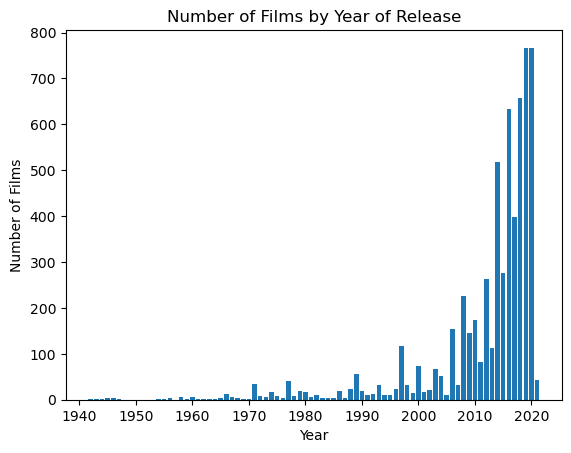

In [848]:
# 1 (10 marks). Create a visualisation (by using the plot that is most appropriate for this) which shows the frequency of movies by year of release.
# Note - using cleaned movie only dataframe as the question has movies only in it.

# Data to plot: count of movies by year of release:
# Years
movies_netflix_years = movies_netflix["Release_Year"].unique()
# Values
movies_netflix_freq = movies_netflix["Release_Year"].value_counts()

import matplotlib.pyplot as plt
# Plot as a bar chart to show the most common years
plt.bar(movies_netflix_years, movies_netflix_freq)
plt.xlabel('Year')
plt.ylabel('Number of Films')
plt.title('Number of Films by Year of Release')


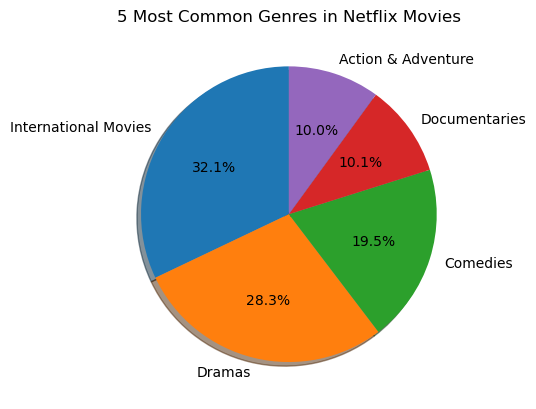

In [849]:
# 2 (15 marks). Create a pie chart which shows the 5 top most popular genres of the movis
  # in the dataset.

# Calculate the most popular genres
# 1. Turn genres into a list
movies_netflix["Listed_In"] = movies_netflix["Listed_In"].str.split(",")
# 2. Explode list to give all genres in a series
movies_explode = movies_netflix["Listed_In"].explode()
# 3. Remove spaces
movies_explode = movies_explode.str.strip()
# 4. Sort by most common
genre_counts = movies_explode.value_counts()
# 5. Get the top five genres
top_five_genres = genre_counts.nlargest(5)
# 6. Plot values as a pie chart
plt.pie(
    top_five_genres,
    startangle=90,
    shadow= True,
    autopct='%1.1f%%',
    labels = top_five_genres.index
)
plt.title('5 Most Common Genres in Netflix Movies')
plt.show()

3. NUMPY (25 points)

In [850]:
# 1 (2 marks). Running the code in this cell throws an error. Why do we get this error
  # and how do we fix it?

# use this numpy array for all exercises in this section
# arr = np.array([0, 56, 82, 500, 140, 43, 92, 10, 25, 11, 18, 26, 150, 240, 364, 196])
# arr

We get an error because the numpy library has not been loaded.\
To correct this we load the library with "import numpy as np"

In [851]:
import numpy as np
arr = np.array([0, 56, 82, 500, 140, 43, 92, 10, 25, 11, 18, 26, 150, 240, 364, 196])
arr

array([  0,  56,  82, 500, 140,  43,  92,  10,  25,  11,  18,  26, 150,
       240, 364, 196])

In [852]:
# 2 (5 marks). How many odd numbers do we have in the array? Show how we get this result using numpy
# 1. Create a Boolean mask to calcualate if a number is odd or even:
mask = arr % 2 != 0
# 2. Apply the mask to the array
odd = arr[mask]
# 3. Count the length of the array
print("The number of odd numbers is", len(odd))
print(odd)

The number of odd numbers is 3
[43 25 11]


In [853]:
# 3 (5 marks). Replace all odd numbers in arr with 999
odd_replace = np.where(arr % 2 != 0, 999, arr)
print(odd_replace)

[  0  56  82 500 140 999  92  10 999 999  18  26 150 240 364 196]


In [854]:
# 4 (8 marks). The above is a 1D array. Convert it into a 4D array and reverse its columns.
# Reshape the array
fourd_arr = odd_replace.reshape(4,4)
# Flip the array to reverse the columns
fourd_arr = np.fliplr(fourd_arr)
print(fourd_arr)


# Desired output
# > array([[500,  82,  56,   0],
# >        [ 10,  92, 999, 140],
# >        [ 26,  18, 999, 999],
# >        [196, 364, 240, 150]])



[[500  82  56   0]
 [ 10  92 999 140]
 [ 26  18 999 999]
 [196 364 240 150]]


In [855]:
# 5 (5 marks). Find and return all values which are higher than 100 and lower or equal than 500.
return_arr = fourd_arr[(fourd_arr > 100) & (fourd_arr <= 500)]
print("The values that are higher than 100 and lower or equal than 500 are", return_arr)

The values that are higher than 100 and lower or equal than 500 are [500 140 196 364 240 150]
